In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
path = './data/'
p1= pd.read_csv(path+'users.csv')
p2= pd.read_csv(path+'books.csv')
p3= pd.read_csv(path+'train_ratings.csv')
p4= pd.read_csv(path+'sample_submission.csv')
p5= pd.read_csv(path+'test_ratings.csv') # test와 sample은 완벽하게 동일하다.

#조금 전처리됨
p6= pd.read_csv('/opt/ml/input/code/users_fillna.csv')
p7= pd.read_csv('/opt/ml/input/code/books_fillna_cate.csv') 
p8= pd.read_csv('/opt/ml/input/code/books_lang.csv') 

users  =p6.copy()
books  =p2.copy()
train  =p3.copy()
sample =p4.copy()
test   =p5.copy()

boks =p8.copy()

print('users shape: ', users.shape) 
print(users.columns)#유저id, 지역, 나이
print('books shape: ', books.shape)
print(books.columns)#isbn(책번호), 제목, 저자, 출판년도, 출판사, img주소, 언어, 범주, 요약, img경로
print('train shape: ', train.shape) 
print(train.columns)# 유저 id, 책isbn, 평점

users shape:  (68092, 3)
Index(['user_id', 'age', 'country'], dtype='object')
books shape:  (149570, 10)
Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')
train shape:  (306795, 3)
Index(['user_id', 'isbn', 'rating'], dtype='object')


110757
File Size: 43 bytes
File Size: 1760 bytes


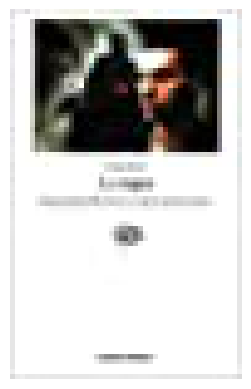

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import requests
fig= plt.plot(figsize=(3,4))
rd = np.random.randint(0, len(books))
print(rd)
image_path = './data/'
file_path = image_path+books['img_path'][rd]
img = np.asarray(Image.open(file_path))
plt.axis("off")
plt.imshow(img)
# print(image_path+books['img_path'][136803])
file_size = os.path.getsize('./data/images/0380708698.01.THUMBZZZ.jpg') 
print('File Size:', file_size, 'bytes') # 없는 이미지
file_size = os.path.getsize('./data/images/0310232716.01.THUMBZZZ.jpg') 
print('File Size:', file_size, 'bytes') # 있는 이미지

In [9]:
books[books['isbn']== '0380708698']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
87000,0380708698,The Horse Latitudes,Robert Ferrigno,1991.0,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380708698.0...,en,['Fiction'],"In an attempt to win back his wayward wife, a ...",images/0380708698.01.THUMBZZZ.jpg


In [8]:
fig= plt.plot(figsize=(3,4))
rd = np.random.randint(0, len(books))
print(rd)
url = books['img_url'][87666]
img = np.asarray(Image.open(requests.get(url, stream=True).raw))
plt.axis("off")
plt.imshow(img)
#없는 이미지가 있는 듯하다. 86999를 넘어가면 그냥 보라화면
#이건 url을 활용해서 이미지를 띄우는 방식이다.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (52375995.py, line 4)

In [10]:
file_list = os.listdir("./data/images/")
rm_list = []
for i in file_list:
    file_size = os.path.getsize('./data/images/'+i)
    if file_size < 500: 
        rm_list.append('./data/images/'+i)
print(len(rm_list))


41896


In [53]:
rm_list[:5]
isbn_lst = [i.split('/')[3].split('.')[0] for i in rm_list]

In [20]:
rd = np.random.choice(isbn_lst)
rd = books[books['isbn']== rd]['img_url'].values[0]
rd

'http://images.amazon.com/images/P/0754048616.01.THUMBZZZ.jpg'

0879514175
http://images.amazon.com/images/P/0879514175.01.THUMBZZZ.jpg


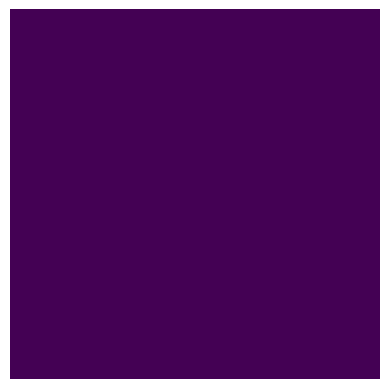

In [113]:
fig= plt.plot(figsize=(3,4))
# rd = np.random.randint(0, len(books))
# url = books['img_url'][rd]
rd = np.random.choice(isbn_lst)
url = books[books['isbn']== rd]['img_url'].values[0]
print(rd)
print(url)
img = np.asarray(Image.open(requests.get(url, stream=True).raw))
plt.axis("off")
plt.imshow(img)
#없는 이미지가 있는 듯하다. 86999를 넘어가면 그냥 보라화면
#이건 url을 활용해서 이미지를 띄우는 방식이다.

파일 상에서 없는 이미지는 url 상으로도 없다. (50번 무작위 확인)

In [63]:
tmp = books[books['isbn'].isin(isbn_lst) ==False]
tmp

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg
5,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,NaN,NaN,NaN,images/0671870432.01.THUMBZZZ.jpg
6,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149563,0689818904,My Grandmother's Journey,John Cech,1998.0,Aladdin,http://images.amazon.com/images/P/0689818904.0...,en,['Juvenile Fiction'],A grandmother tells the story of her eventful ...,images/0689818904.01.THUMBZZZ.jpg
149564,0743525493,The Motley Fool's What To Do with Your Money N...,David Gardner,2002.0,Simon & Schuster Audio,http://images.amazon.com/images/P/0743525493.0...,NaN,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg
149566,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,en,['Nature'],A daring twist on the travel-adventure genre t...,images/0767907566.01.THUMBZZZ.jpg
149568,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,en,['Fiction'],These hilarious stories by the creator of publ...,images/0912333022.01.THUMBZZZ.jpg


In [57]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
# !rm /opt/ml/input/code/books_clustering.csv
if not os.path.isfile('/opt/ml/input/code/books_img.csv'):
	print('saving')
	books.to_csv('/opt/ml/input/code/books_img.csv', index=False)

saving


In [66]:
train = train.merge(books)
train

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,67544,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
2,123629,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
3,200273,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
4,210926,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
306790,278843,0743525493,7,The Motley Fool's What To Do with Your Money N...,David Gardner,2002.0,Simon & Schuster Audio,http://images.amazon.com/images/P/0743525493.0...,NaN,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg
306791,278851,067161746X,6,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,en,['Humor'],A tongue-in-cheek survival guide for single pe...,images/067161746X.01.THUMBZZZ.jpg
306792,278851,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,NaN,NaN,NaN,images/0884159221.01.THUMBZZZ.jpg
306793,278851,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,en,['Fiction'],These hilarious stories by the creator of publ...,images/0912333022.01.THUMBZZZ.jpg


In [67]:
tmp = train[train['isbn'].isin(isbn_lst) ==False]
tmp

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,67544,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
2,123629,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
3,200273,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
4,210926,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
306786,278648,0449225208,3,The Christmas Spirit,Patricia Wynn,1996.0,Ivy Books,http://images.amazon.com/images/P/0449225208.0...,en,['Fiction'],"Taking human form as part of a wager, mischiev...",images/0449225208.01.THUMBZZZ.jpg
306789,278843,0689818904,7,My Grandmother's Journey,John Cech,1998.0,Aladdin,http://images.amazon.com/images/P/0689818904.0...,en,['Juvenile Fiction'],A grandmother tells the story of her eventful ...,images/0689818904.01.THUMBZZZ.jpg
306790,278843,0743525493,7,The Motley Fool's What To Do with Your Money N...,David Gardner,2002.0,Simon & Schuster Audio,http://images.amazon.com/images/P/0743525493.0...,NaN,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg
306793,278851,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,en,['Fiction'],These hilarious stories by the creator of publ...,images/0912333022.01.THUMBZZZ.jpg


In [79]:
tmp.drop(('img_path'), axis=1, inplace=True)
tmp

/tmp/ipykernel_103941/1193712424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.drop(('img_path'), axis=1, inplace=True)


,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
...,...,...,...
306786,278648,0449225208,3
306789,278843,0689818904,7
306790,278843,0743525493,7
306793,278851,0912333022,7


In [80]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
!rm /opt/ml/input/code/train_img.csv
if not os.path.isfile('/opt/ml/input/code/train_img.csv'):
	print('saving')
	tmp.to_csv('/opt/ml/input/code/train_img.csv', index=False)

saving


In [105]:
'0671870432' in isbn_lst

False

In [108]:
train_img = tmp
train_img, train

(        user_id        isbn  rating
 0             8  0002005018       4
 1         67544  0002005018       7
 2        123629  0002005018       8
 3        200273  0002005018       8
 4        210926  0002005018       9
 ...         ...         ...     ...
 306786   278648  0449225208       3
 306789   278843  0689818904       7
 306790   278843  0743525493       7
 306793   278851  0912333022       7
 306794   278851  1569661057      10
 
 [257475 rows x 3 columns],
         user_id        isbn  rating  \
 0             8  0002005018       4   
 1         67544  0002005018       7   
 2        123629  0002005018       8   
 3        200273  0002005018       8   
 4        210926  0002005018       9   
 ...         ...         ...     ...   
 306790   278843  0743525493       7   
 306791   278851  067161746X       6   
 306792   278851  0884159221       7   
 306793   278851  0912333022       7   
 306794   278851  1569661057      10   
 
                                            

In [111]:
train[train['isbn'].isin(isbn_lst)]

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
7,2954,0060973129,8,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
13,11676,0399135782,8,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
14,29526,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
15,46398,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
16,49635,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
306780,278563,380520406X,10,Die Apotheke Manitous: Das medizinische Wissen...,H. J Stammel,1986.0,Wunderlich,http://images.amazon.com/images/P/380520406X.0...,NaN,NaN,NaN,images/380520406X.01.THUMBZZZ.jpg
306787,278659,0345330293,10,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.0...,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg
306788,278713,0670528951,7,Orson Welles,Barbara Leaming,1985.0,Penguin USA,http://images.amazon.com/images/P/0670528951.0...,en,['Biography & Autobiography'],"Based on two years of interviews and research,...",images/0670528951.01.THUMBZZZ.jpg
306791,278851,067161746X,6,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,en,['Humor'],A tongue-in-cheek survival guide for single pe...,images/067161746X.01.THUMBZZZ.jpg


In [114]:

test.loc[test[(test['rating']) >= 0 & (test['rating'] <= 0)].index, 'rating'] = -1

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            76689, 76690, 76691, 76692, 76693, 76694, 76695, 76696, 76697,
            76698],
           dtype='int64', length=76699)

In [121]:
(train['rating'] + train['rating']) /2

0          4.0
1          7.0
2          8.0
3          8.0
4          9.0
          ... 
306790     7.0
306791     6.0
306792     7.0
306793     7.0
306794    10.0
Name: rating, Length: 306795, dtype: float64

In [123]:
train['rating']

0          4
1          7
2          8
3          8
4          9
          ..
306790     7
306791     6
306792     7
306793     7
306794    10
Name: rating, Length: 306795, dtype: int64

In [153]:
rat1= pd.read_csv('/opt/ml/input/code/CAT4.csv')
rat2= pd.read_csv('/opt/ml/input/code/submit/20221025_085059_WDN.csv') 
rat3= pd.read_csv('/opt/ml/input/code/submit/20221103_071839_CNN_FM.csv') 

,user_id,isbn,rating
0,11676,0002005018,7.005523
1,116866,0002005018,7.028052
2,152827,0060973129,4.726351
3,157969,0374157065,7.789334
4,67958,0399135782,4.615319


,user_id,isbn,rating
0,11676,0002005018,7.005523
1,116866,0002005018,7.028052
2,152827,0060973129,7.589527
3,157969,0374157065,7.789334
4,67958,0399135782,7.422979
5,213191,0399135782,7.098634
6,245827,0399135782,6.686837
7,11676,0671870432,6.651772
8,263256,1558746218,6.894732
9,226745,1881320189,6.892656


In [152]:
ans = (rat1['rating'] + rat2['rating'] + rat3['rating']) / 3
ans[:30]

0     7.005523
1     7.028052
2     4.726351
3     7.789334
4     4.615319
5     4.399089
6     4.124558
7     4.101182
8     6.894732
9     4.261770
10    6.230542
11    6.970618
12    7.111943
13    5.854961
14    7.571221
15    6.269932
16    6.259616
17    8.058303
18    4.381469
19    7.805721
20    5.425451
21    6.897042
22    6.668126
23    6.749409
24    7.109678
25    7.087022
26    7.045948
27    6.626614
28    7.062131
29    5.642816
Name: rating, dtype: float64

In [140]:
rat3.loc[ans[rat3['rating'] < 0].index]['rating']

2       -1.0
4       -1.0
5       -1.0
6       -1.0
7       -1.0
        ... 
76694   -1.0
76695   -1.0
76696   -1.0
76697   -1.0
76698   -1.0
Name: rating, Length: 25507, dtype: float64

In [144]:
ans.loc[(ans[rat3['rating'] < 0].index)]['rating'] = (rat1.loc[ans[rat3['rating'] < 0].index]['rating'] + rat2.loc[ans[rat3['rating'] < 0].index]['rating']) /2
ans[:30]


0     7.005523
1     7.028052
2     4.726351
3     7.789334
4     4.615319
5     4.399089
6     4.124558
7     4.101182
8     6.894732
9     4.261770
10    6.230542
11    6.970618
12    7.111943
13    5.854961
14    7.571221
15    6.269932
16    6.259616
17    8.058303
18    4.381469
19    7.805721
20    5.425451
21    6.897042
22    6.668126
23    6.749409
24    7.109678
25    7.087022
26    7.045948
27    6.626614
28    7.062131
29    5.642816
Name: rating, dtype: float64

In [145]:
ans = rat1
ans['rating'] = (rat1['rating'] + rat2['rating'] + rat3['rating'])/3

ans_2 = rat1
ans_2['rating'] = (rat1['rating'] + rat2['rating'])/2
ans['rating'].loc[np.where(rat3['rating'] < 0)] = ans_2['rating'].loc[np.where(rat3['rating'] < 0)]

ans[:30]


/tmp/ipykernel_103941/2477951732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans['rating'].loc[np.where(rat3['rating'] < 0)] = ans_2['rating'].loc[np.where(rat3['rating'] < 0)]


,user_id,isbn,rating
0,11676,0002005018,7.082019
1,116866,0002005018,6.707990
2,152827,0060973129,6.068254
3,157969,0374157065,7.577155
4,67958,0399135782,6.036185
5,213191,0399135782,5.593582
6,245827,0399135782,5.526204
7,11676,0671870432,5.547726
8,263256,1558746218,6.965391
9,226745,1881320189,5.713458


In [149]:
ans = rat1.copy()

for i in ans.index:
	print(i)
	print(ans.loc[i])
	if rat3.loc[i]['rating'] < 0:
		ans.loc[i]['rating']
	break

0
user_id         11676
isbn       0002005018
rating       7.082019
Name: 0, dtype: object


,user_id,isbn,rating
0,11676,0002005018,6.989786
1,116866,0002005018,6.973089
2,152827,0060973129,4.159470
3,157969,0374157065,7.669213
4,67958,0399135782,4.164412


In [194]:
rat1= pd.read_csv('/opt/ml/input/code/CAT_best.csv')
rat2= pd.read_csv('/opt/ml/input/code/output.csv') 
rat3= pd.read_csv('/opt/ml/input/code/submit/20221103_083422_CNN_FM.csv') 
rat4= pd.read_csv('/opt/ml/input/code/Bk_DeepCoNN.csv') 

In [195]:
rat1['rating'] = np.where(rat1['rating'] > 10, 10, rat1['rating'])
rat2['rating'] = np.where(rat2['rating'] > 10, 10, rat2['rating'])
rat3['rating'] = np.where(rat3['rating'] > 10, 10, rat3['rating'])
rat4['rating'] = np.where(rat4['rating'] > 10, 10, rat4['rating'])

rat1['rating'] = np.where(rat1['rating'] < 0, 0, rat1['rating'])
rat2['rating'] = np.where(rat2['rating'] < 0, 0, rat2['rating'])
rat3['rating'] = np.where(((rat3['rating'] < 0) & (rat3['rating'] != -1)), 0, rat3['rating'])
rat4['rating'] = np.where(rat4['rating'] < 0, 0, rat4['rating'])

In [186]:
rat3[(rat3['rating'] != -1) & (rat3['rating'] < 0)]

,user_id,isbn,rating


In [187]:
rat2[rat2['rating'] > 10]

,user_id,isbn,rating


In [196]:
# rat1.where(rat1['rating'] >= 0, 0, inplace=True)
# rat2.where(rat2['rating'] >= 0, 0, inplace=True)
# rat1.where(rat1['rating'] <= 10, 10, inplace=True)
# rat2.where(rat2['rating'] <= 10, 10, inplace=True)

In [203]:
ans = rat1.copy()
# ans['rating'] = ((rat1['rating'] + rat2['rating'] + rat3['rating'])/3).copy()
ans['rating'] = ((0.6 * rat1['rating'] + 0.3 * rat2['rating'] + 0.05 * rat3['rating'] + 0.05 * rat4['rating'])).copy()

display(ans.head())
ans_2 = rat1.copy()
# ans_2['rating'] = ((rat1['rating'] + rat2['rating'])/2).copy()
ans_2['rating'] = (((6 + 12/19) * rat1['rating'] + (3 + 6/19) * rat2['rating'] + (0.5 + 1/19) * rat4['rating']) / 10).copy()

a = ans['rating'].copy()
b = ans_2['rating'].copy()

idx = np.where(rat3['rating'] == -1)
for i in idx:
    a[i] = b[i]

ans.rating = a
ans[:30]

,user_id,isbn,rating
0,11676,0002005018,6.964874
1,116866,0002005018,7.388912
2,152827,0060973129,7.318288
3,157969,0374157065,7.848498
4,67958,0399135782,7.225774


,user_id,isbn,rating
0,11676,0002005018,6.964874
1,116866,0002005018,7.388912
2,152827,0060973129,8.143897
3,157969,0374157065,7.848498
4,67958,0399135782,8.041645
5,213191,0399135782,7.753532
6,245827,0399135782,7.195745
7,11676,0671870432,6.580603
8,263256,1558746218,6.968888
9,226745,1881320189,7.237246


In [204]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
# !rm /opt/ml/input/code/triplecross.csv
if not os.path.isfile('/opt/ml/input/code/quadra_mon.csv'):
	print('saving')
	ans.to_csv('/opt/ml/input/code/quadra_mon.csv', index=False)

saving


In [191]:
ans[ans['rating'] > 10]

,user_id,isbn,rating


In [182]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
!rm /opt/ml/input/code/triplecross.csv
if not os.path.isfile('/opt/ml/input/code/rat2.csv'):
	print('saving')
	rat2.to_csv('/opt/ml/input/code/rat2.csv', index=False)

saving


In [202]:
rat1[rat1['rating'] < 0]

,user_id,isbn,rating
